<a href="https://colab.research.google.com/github/Divyansh2510/Linear_Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
class Logistic_Regression:
  def __init__(self, ln , no_iter) : # ln = learning rate , no_iter = no. of iterations
    self.ln=ln
    self.no_iter = no_iter

  def fit(self,X,Y):
   self.m,self.n = X.shape

   # initiating weight and bias value
   self.w = np.zeros(self.n)
   self.b = 0
   self.X = X
   self.Y = Y

   # implementing gradient descent for optimizzation
   for i in range(self.no_iter):
    self.update_weights()

  def update_weights(self):
   Y_hat =1/(1+np.exp(-(self.X.dot(self.w) +  self.b)))

   #derivates

   dw = (1/self.m)*np.dot(self.X.T,(Y_hat - self.Y))
   db = (1/self.m)*np.sum(Y_hat - self.Y)

   #updating weights and bias using gradient descent
   self.w = self.w - self.ln*dw
   self.b = self.b - self.ln*db

  def predict(self,X):

   Y_pred = 1/(1+np.exp(-(X.dot(self.w) +  self.b)))
   Y_pred = np.where(Y_pred > 0.5,1,0)
   return Y_pred


In [ ]:
diabetes = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
target = diabetes['Outcome']
diabetes = diabetes.drop(columns='Outcome',axis=1)

In [ ]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
target.shape

(768,)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
X = diabetes
Y = target

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler = scaler.fit(X)

In [ ]:
scaler_data = scaler.transform(X)

In [ ]:
print(scaler_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(scaler_data,Y,test_size=0.2,random_state=2)

In [ ]:
classifier = Logistic_Regression(ln = 0.01, no_iter = 1000)

In [ ]:
classifier.fit(X_train,Y_train)

In [ ]:
X_train_predict = classifier.predict(X_train)
test_acc = accuracy_score(Y_train,X_train_predict)

In [ ]:
print("X_train Accuracy:",test_acc)

X_train Accuracy: 0.7768729641693811


In [ ]:
X_test_predict = classifier.predict(X_test)
test_acc2 = accuracy_score(Y_test,X_test_predict)

In [ ]:
print("X_train Accuracy:",test_acc2)

X_train Accuracy: 0.7662337662337663


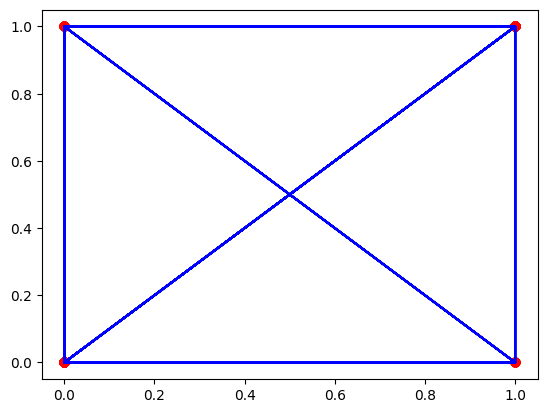

In [ ]:
plt.scatter(X_train_predict,Y_train,color='red')
plt.plot(X_test_predict,Y_test,color='blue')
plt.show()